## Problem Statement

* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load dataset
data = pd.read_csv(r'D:\Simplilearn\project\Data-Science-Capstone-Projects-master\Project 2\Healthcare - Diabetes\health care diabetes.csv')
data.head() # view first five rows of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

### Project Task : Week 1

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

    • Glucose

    • BloodPressure

    • SkinThickness

    • Insulin

    • BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* There are 7 features (including target variable) which has int64 data type.
* There are 2 features which has float64 data type.

In [6]:
# check missing values
data.Outcome.isna().sum()

0

In [7]:
# there is no missing values in target variable.
# extracting target variable into seperate varibale

y = data.Outcome
x = data.iloc[:,:-1]

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
# categorical or numerical variable

counts=[[],[],[]]
for col in x.columns:
    unique = len(x[col].unique())
    if unique == 1:
        counts[0].append(col)
    elif unique == 2:
        counts[1].append(col)
    else:
        counts[2].append(col)
        
# counts[0] --> unique value.
# counts[1] --> binary value.
# counts[2] --> categorical/Numerical variable

In [10]:
print(f'unique featues: {len(counts[0])}')
print(f'binary featues: {len(counts[1])}')
print(f'categorical/Numerical featues: {len(counts[2])}')

unique featues: 0
binary featues: 0
categorical/Numerical featues: 8


In [11]:
print("{0:34} {1:20} {2:20}".format('Column Name','Null Value count','Zero Value count'))
for col in x.columns:
    null = x[col].isna().sum()
    zero = sum(x[col].values ==0)
    print("{0:24} {1:20} {2:20}".format(col,null,zero))

Column Name                        Null Value count     Zero Value count    
Pregnancies                                 0                  111
Glucose                                     0                    5
BloodPressure                               0                   35
SkinThickness                               0                  227
Insulin                                     0                  374
BMI                                         0                   11
DiabetesPedigreeFunction                    0                    0
Age                                         0                    0


* There is no null values in any columns.
* Only zeros values are found.
* A value of zero does not make sense and thus indicates missing value: Glucose, BloodPressure, SkinThickness, Insulin, BMI.

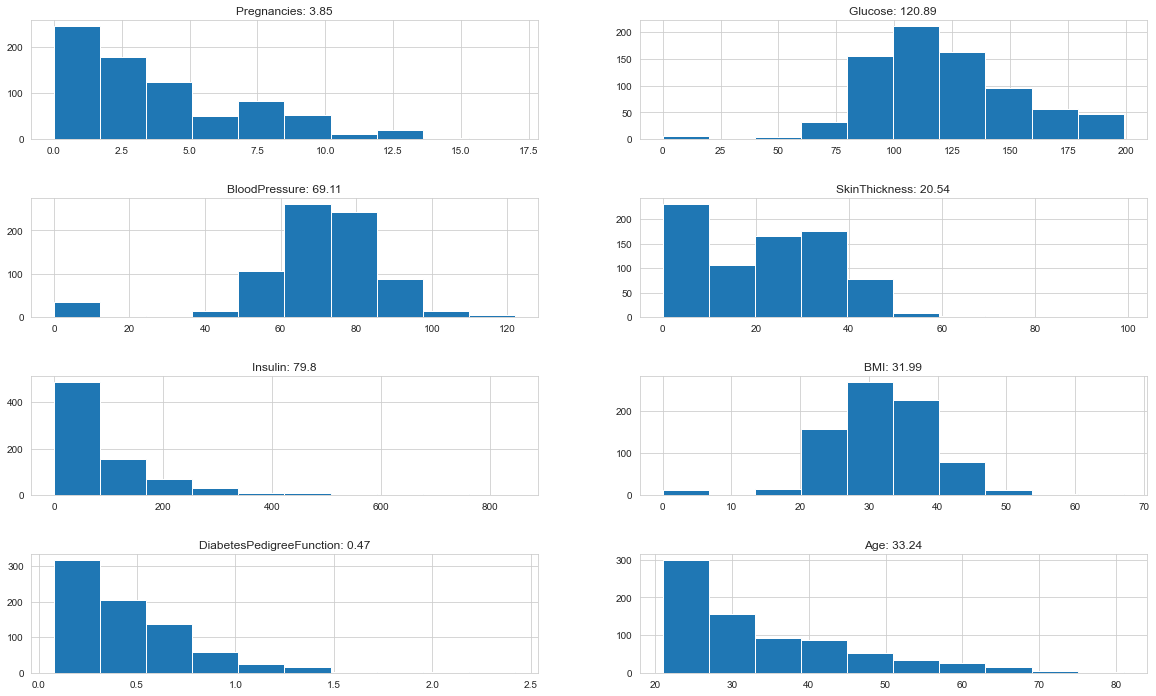

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(20,12))
fig.subplots_adjust(hspace=0.5)
axs=axs.ravel()
i=0
for col in x.columns:
    axs[i].hist(x[col])
    axs[i].set_title(col+': '+str(round(x[col].mean(),2)))
    i+=1
plt.show()

Zero values treatment for the below columns:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

Fill column mean at the place of Zero

In [13]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# missing value (zero value) treatment
for col in columns:
    for i in range(len(x[col])):
        if x.loc[i,col] == 0:
            x.loc[i,col]=x[col].mean()

In [14]:
d_type = [x[col].dtype for col in x.columns]

In [15]:
dtype_=[]
for typ in d_type:
    if typ =='int64':
        dtype_.append('int64')
    elif typ =='float64':
        dtype_.append('float64')

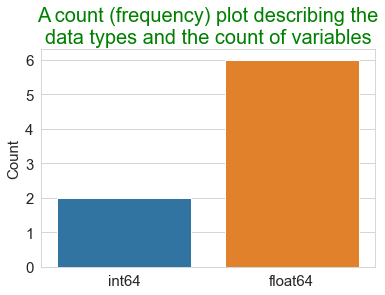

In [16]:
# plt.figure(figsize=(5,6))
sns.countplot(dtype_)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontdict={'fontsize':15})
plt.title('A count (frequency) plot describing the\ndata types and the count of variables',fontdict={'fontsize':20,
                                                                                                   'horizontalalignment':'center',
                                                                                                    'color':'green'})
plt.show()

There are six "float64" type columns and 2 "int64" type.

### Project Task : Week 2 

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

In [17]:
def categorise_cols(col):
    sample = []
    for i in x[col]:
        if i<x[col].quantile(0.20):
            sample.append('very low\n'+str(round(x[col].quantile(0)))+' to '+str(round(x[col].quantile(0.20))))
        elif i>=x[col].quantile(0.20)and i<x[col].quantile(0.40):
            sample.append('low\n'+str(round(x[col].quantile(0.20)))+' to '+str(round(x[col].quantile(0.40))))
        elif i>=x[col].quantile(0.40)and i<x[col].quantile(0.60):
            sample.append('medium\n'+str(round(x[col].quantile(0.40)))+' to '+str(round(x[col].quantile(0.60))))
        elif i>=x[col].quantile(0.60)and i<x[col].quantile(0.80):
            sample.append('high\n'+str(round(x[col].quantile(0.60)))+' to '+str(round(x[col].quantile(0.80))))
        else:
            sample.append('very high\n'+str(round(x[col].quantile(0.80)))+' to '+str(round(x[col].quantile(1))))
            
        orderlist = ['very low\n'+str(round(x[col].quantile(0)))+' to '+str(round(x[col].quantile(0.20))),
                     'low\n'+str(round(x[col].quantile(0.20)))+' to '+str(round(x[col].quantile(0.40))),
                     'medium\n'+str(round(x[col].quantile(0.40)))+' to '+str(round(x[col].quantile(0.60))),
                     'high\n'+str(round(x[col].quantile(0.60)))+' to '+str(round(x[col].quantile(0.80))),
                     'very high\n'+str(round(x[col].quantile(0.80)))+' to '+str(round(x[col].quantile(1)))]
    return sample,orderlist

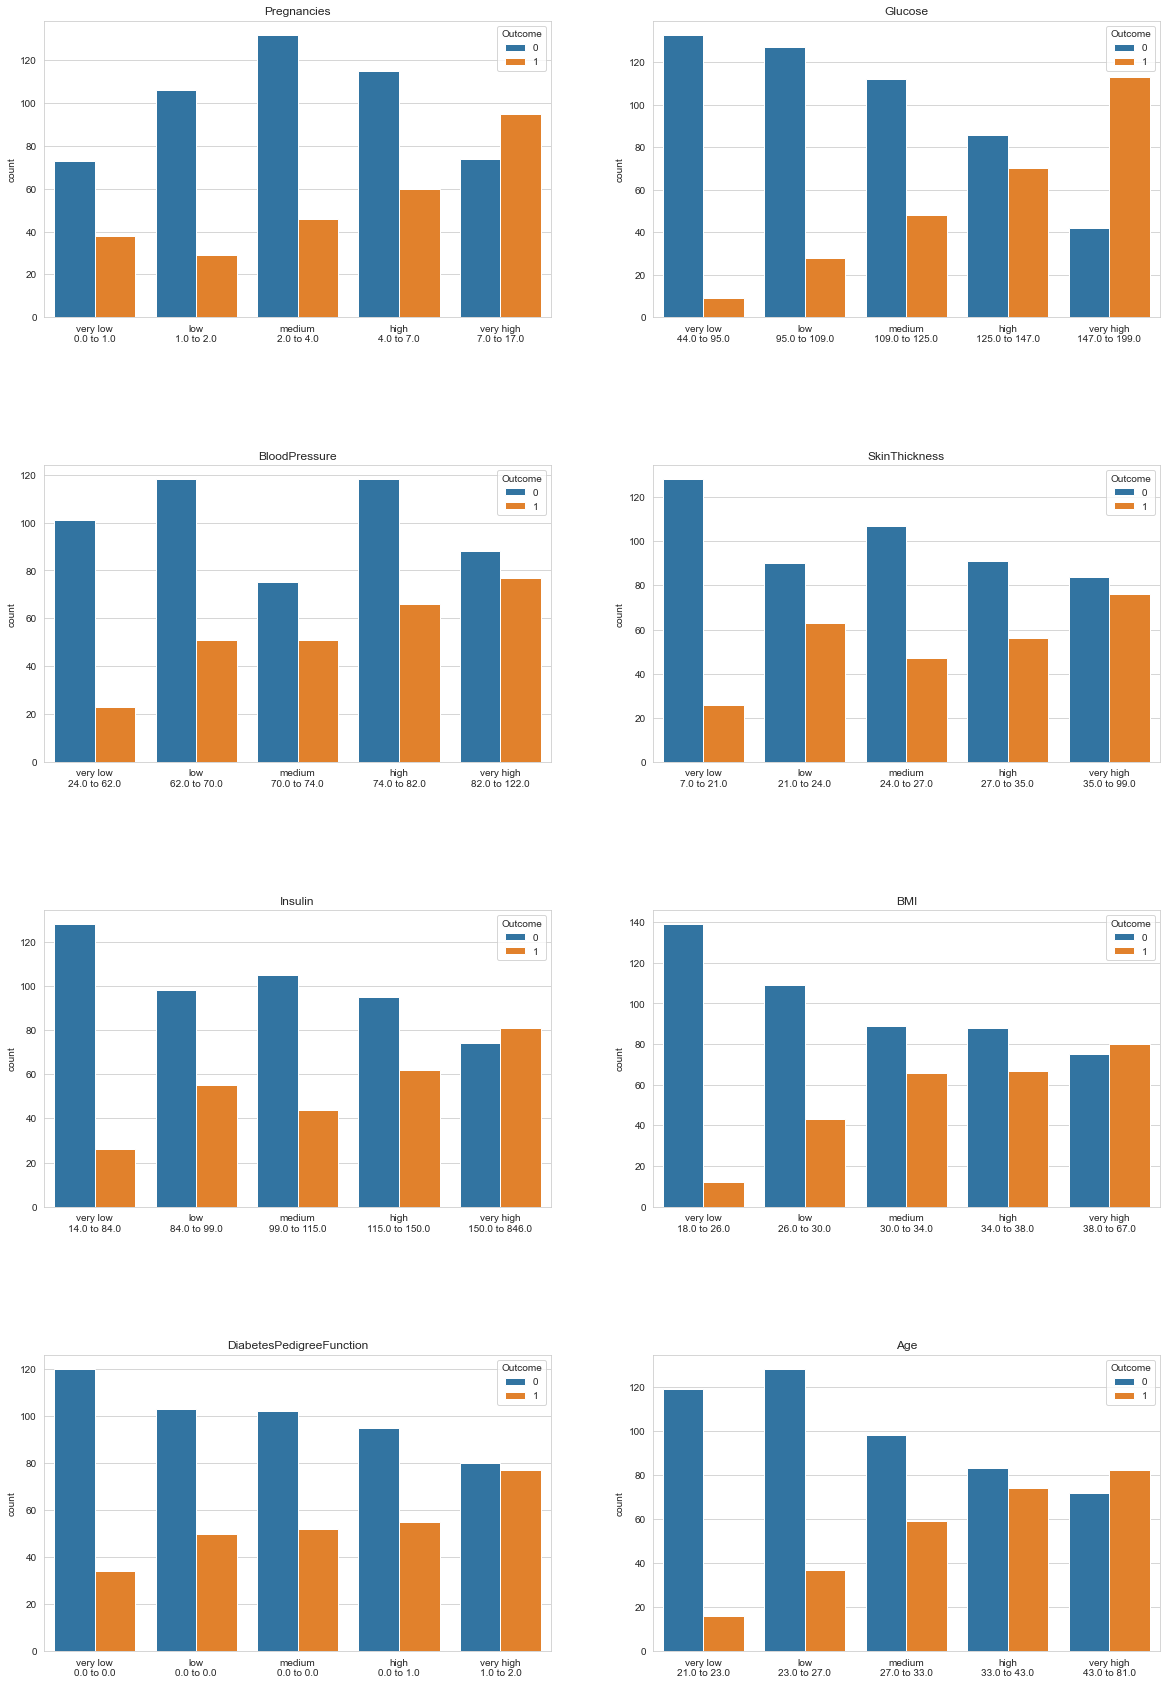

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(20,30))
fig.subplots_adjust(hspace=0.5)
axs=axs.ravel()
i=0
for col in x.columns:
    sample_x, orderlist_x=categorise_cols(col)
    sns.countplot(sample_x,hue=y,ax=axs[i],order=orderlist_x)
    axs[i].set_title(col)
    i+=1
fig.show()

* From the above set of graph it is clear that as there is a solid positive correlation of Age, BMI, Glucose with the target variable i.e. Diabetes positive cases.
* Higher the blood pressure and glucose level higher will be the chances of diabetes.
* All the columns shows positive correleation with the output variable.

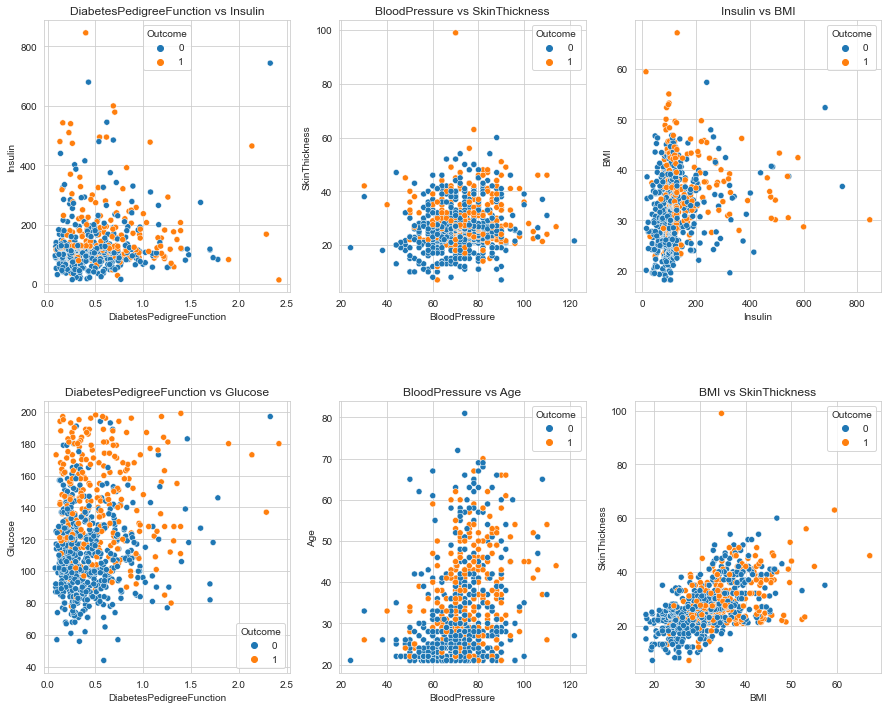

In [19]:
fig, axs = plt.subplots(2,3, figsize=(15,12))
fig.subplots_adjust(hspace=0.4)
axs=axs.ravel()
A_list = [['DiabetesPedigreeFunction','Insulin'],['BloodPressure', 'SkinThickness'],['Insulin','BMI'],
          ['DiabetesPedigreeFunction', 'Glucose' ],['BloodPressure','Age'],['BMI','SkinThickness']]
i=0
for col,col1 in A_list:
    sns.scatterplot(x[col],x[col1],hue=y,ax=axs[i])
    axs[i].set_title(col+' vs '+col1)
    i+=1
        
fig.show()

* The above scatter plot shows that we will able to separate target variable upto some extinct.
* For visualizing all relations, now we will plot pairplot.

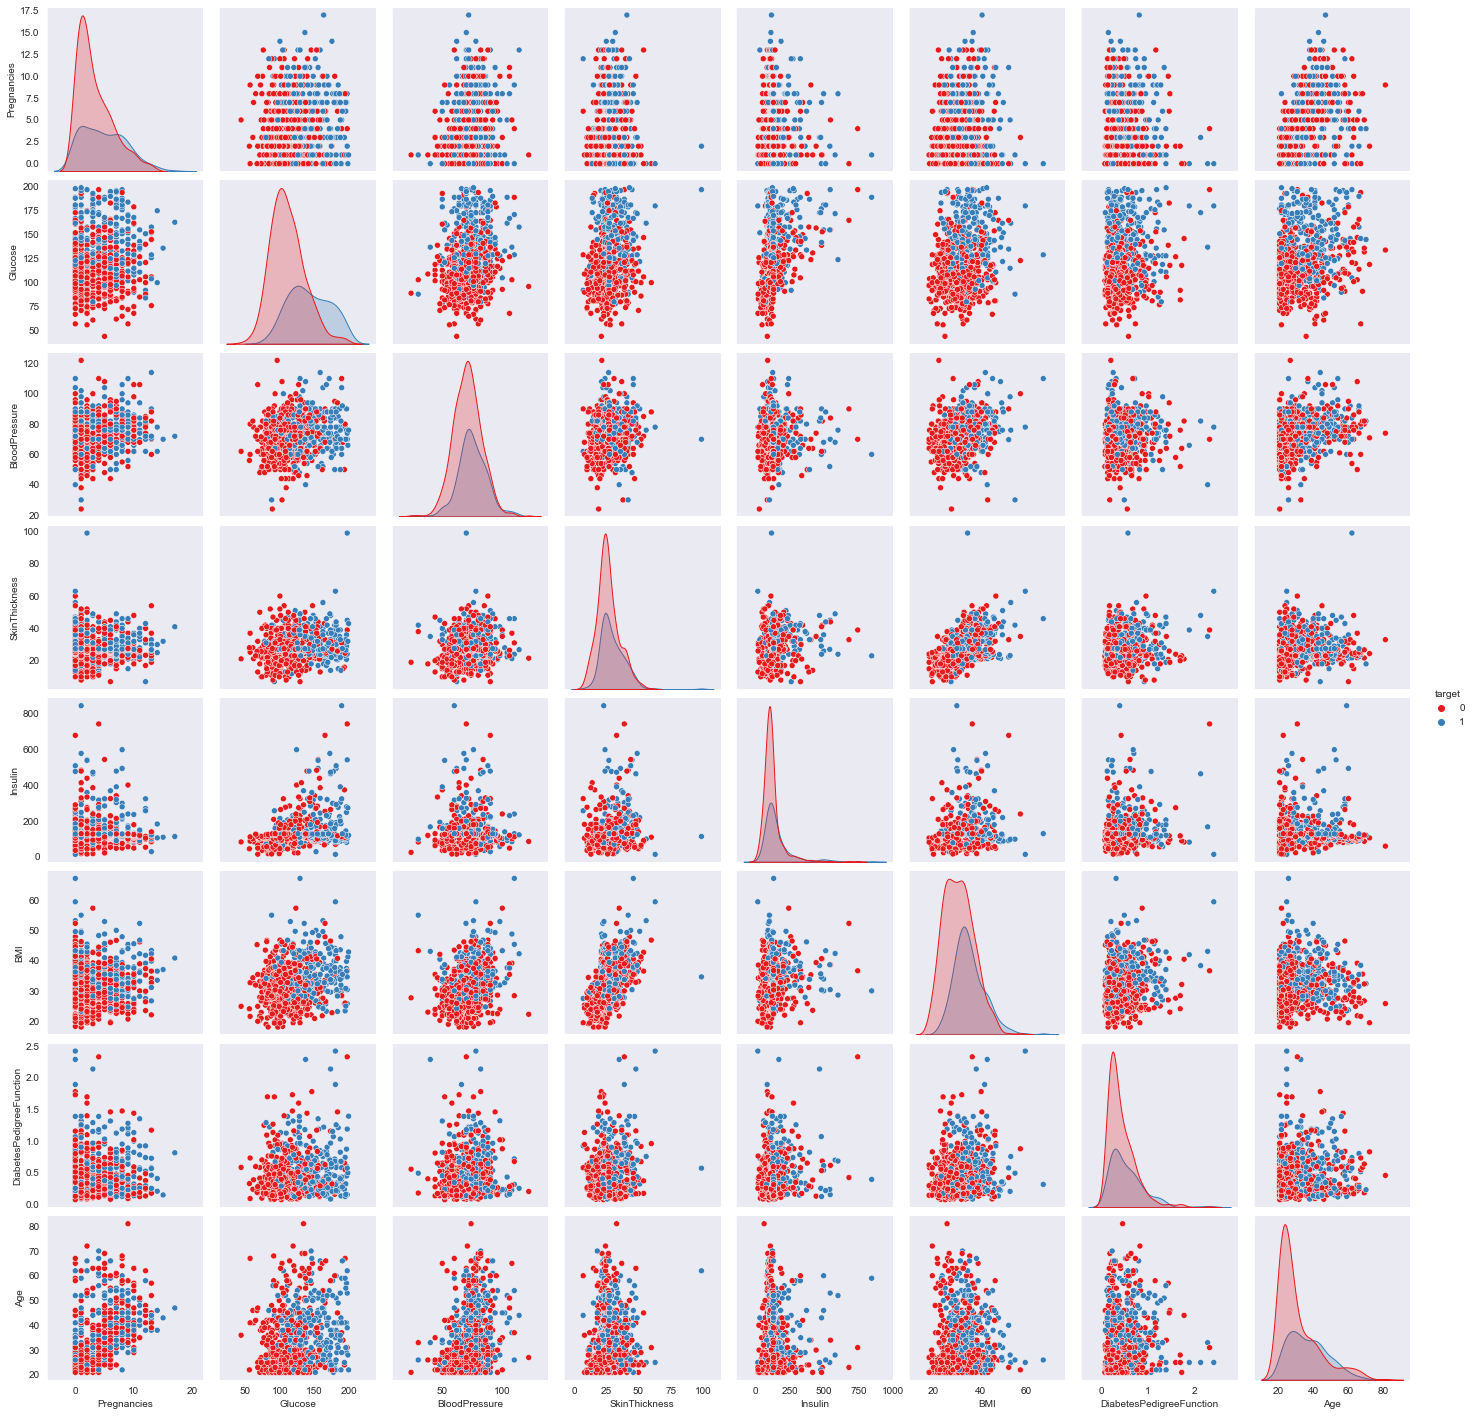

In [20]:
# pairplot
sns.set_style(style='dark')
x['target']=y
sns.pairplot(x,hue='target',palette='Set1')
plt.show()

* From the above pairplot we can conclude that variables are not linearly separable.

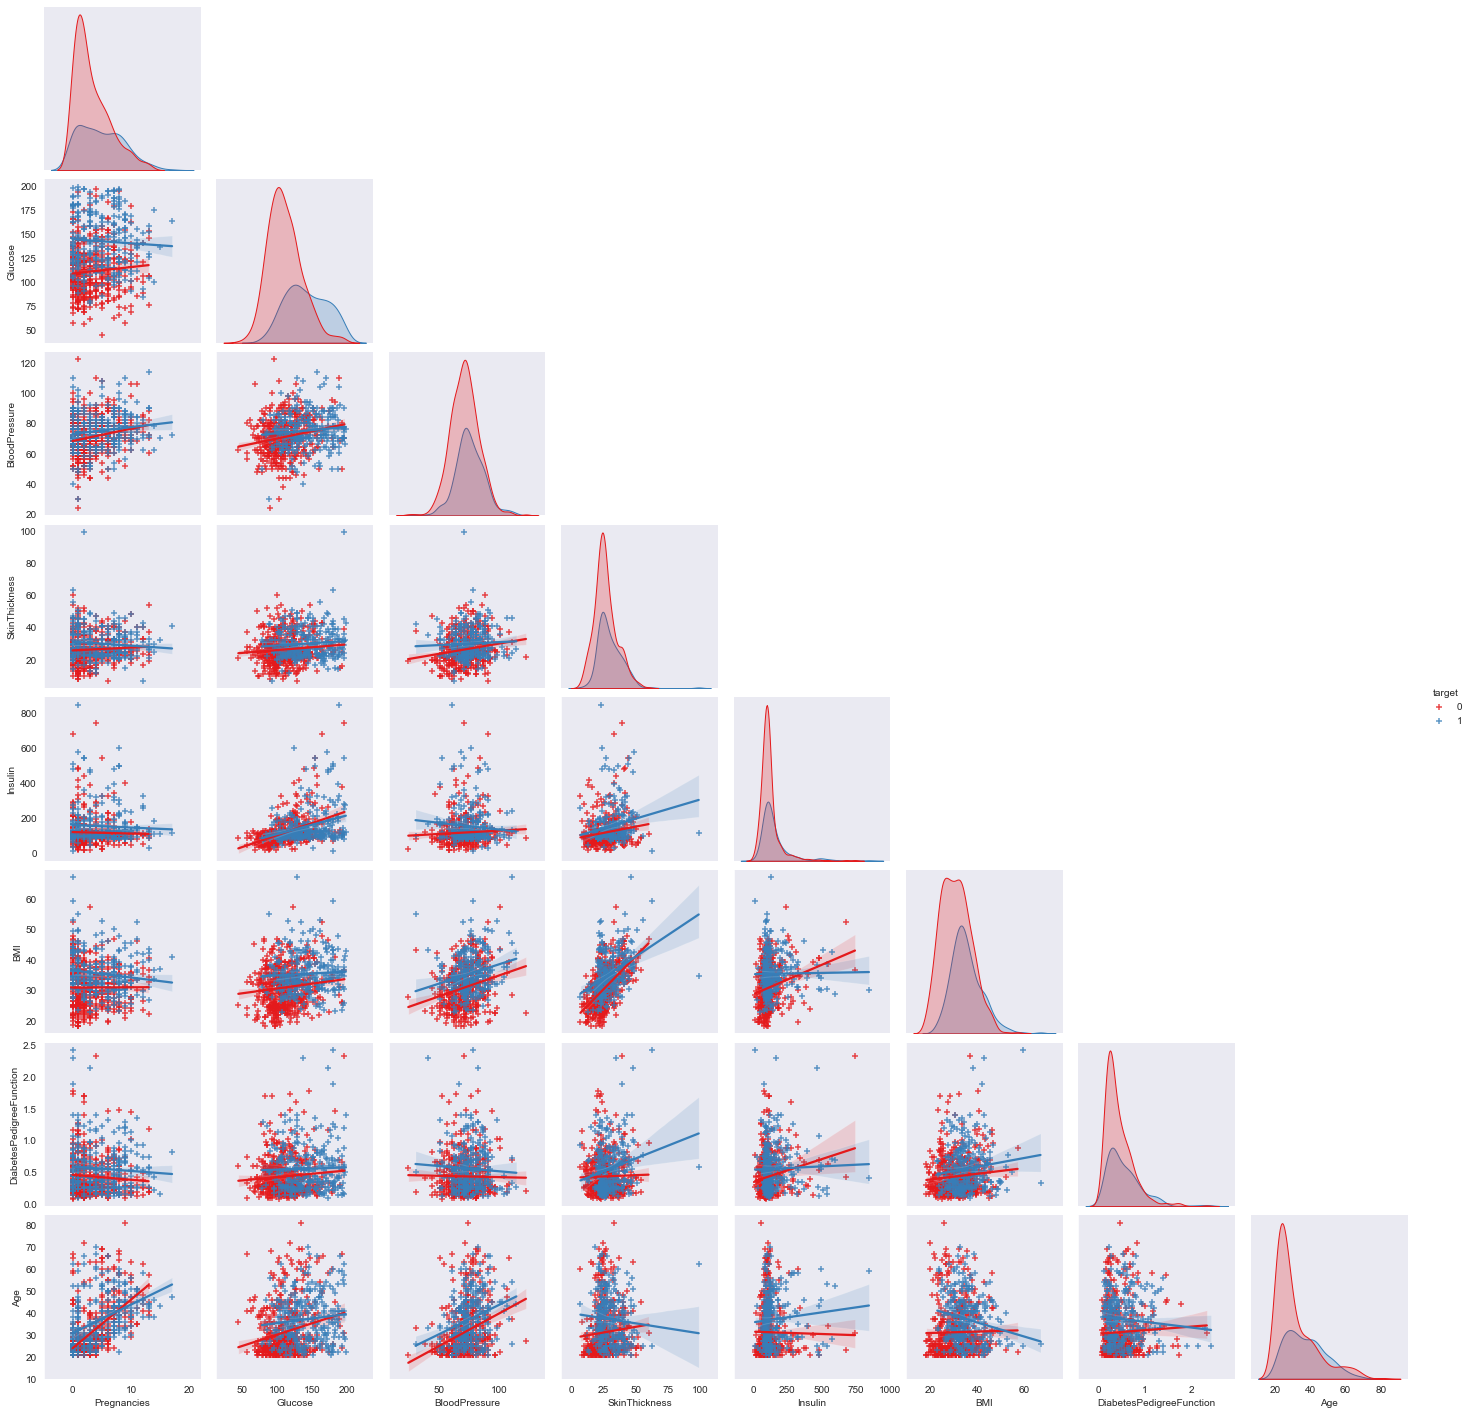

In [21]:
# pairplot
sns.set_style(style='dark')
x['target']=y
sns.pairplot(x,hue='target',palette='Set1',diag_kind='kde',kind='reg',corner=True,markers='+')
plt.show()

In [22]:
## check the correlation between the variables

In [23]:
x.drop(['target'],axis=1, inplace=True)

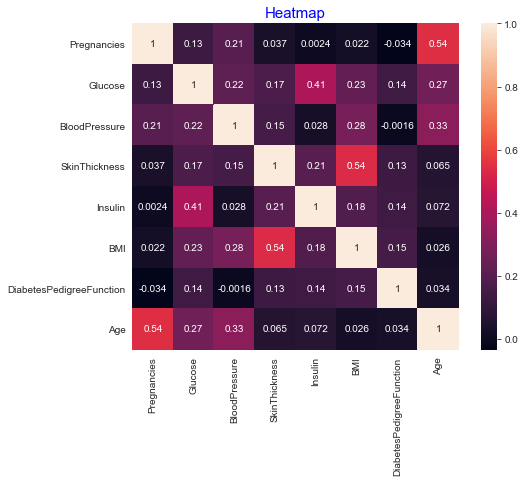

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(),annot=True,square=True)
plt.title('Heatmap',fontdict={'fontsize':15,
                             'color':'blue'},)
plt.show()

### Project Task: Week 3

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

* This problem is a classification problem in which we have to predict wheather a person is suffering from diabeties or not.
* I will use four models:

    a) logistic Regression
    
    b) Random Forest
    
    c) SVM
    
    d) KNN

* K-Fold validation technique will be use in all models.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

### K-Fold

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_val_predict,RepeatedStratifiedKFold
from sklearn.metrics import recall_score,roc_auc_score,accuracy_score,confusion_matrix,f1_score,precision_score,roc_curve

In [26]:
def get_stats(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    con_mat = confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp = con_mat[0][0],con_mat[0][1],con_mat[1][0],con_mat[1][1]
    precision = round(precision_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    specificity = round(tn/(tn+fp),2)
    f1_score_ = round(f1_score(y_test,y_pred),2)
    accuracy = round(accuracy_score(y_test,y_pred),2)
    return [accuracy,precision,recall,specificity,round(1-specificity,2),f1_score_]

In [27]:
score_lr = []
score_rf = []
score_svm = []
score_dt = []
score_knn = []

kf = StratifiedKFold(n_splits=10,random_state=100)
k_fold_df=pd.DataFrame()
for train_index,test_index in kf.split(x,y):
    x_train,x_test,y_train,y_test = x.iloc[train_index,:],x.iloc[test_index,:],y[train_index],y[test_index]
    score_lr.append(get_stats(LogisticRegression(),x_train,y_train,x_test,y_test))
    score_rf.append(get_stats(RandomForestClassifier(n_estimators=40),x_train,y_train,x_test,y_test))
    score_svm.append(get_stats(SVC(probability=True),x_train,y_train,x_test,y_test))
    score_dt.append(get_stats(DecisionTreeClassifier(),x_train,y_train,x_test,y_test))
    score_knn.append(get_stats(KNeighborsClassifier(n_neighbors=5),x_train,y_train,x_test,y_test))

    
k_fold_df['Log_Reg']=pd.DataFrame(score_lr,columns=['Accuracy','Precision','Recall','Specificity','FPR','F1_score']).mean(axis=0)
k_fold_df['Ran_For']=pd.DataFrame(score_rf,columns=['Accuracy','Precision','Recall','Specificity','FPR','F1_score']).mean(axis=0)
k_fold_df['SVM']=pd.DataFrame(score_svm,columns=['Accuracy','Precision','Recall','Specificity','FPR','F1_score']).mean(axis=0)
k_fold_df['D_Tree']=pd.DataFrame(score_dt,columns=['Accuracy','Precision','Recall','Specificity','FPR','F1_score']).mean(axis=0)
k_fold_df['KNN']=pd.DataFrame(score_knn,columns=['Accuracy','Precision','Recall','Specificity','FPR','F1_score']).mean(axis=0)

In [28]:
k_fold_df

,Log_Reg,Ran_For,SVM,D_Tree,KNN
Accuracy,0.773,0.749,0.764,0.707,0.714
Precision,0.735,0.679,0.750,0.580,0.609
Recall,0.569,0.550,0.486,0.579,0.516
Specificity,0.884,0.856,0.910,0.776,0.822
FPR,0.116,0.144,0.090,0.224,0.178
F1_score,0.638,0.607,0.582,0.578,0.557


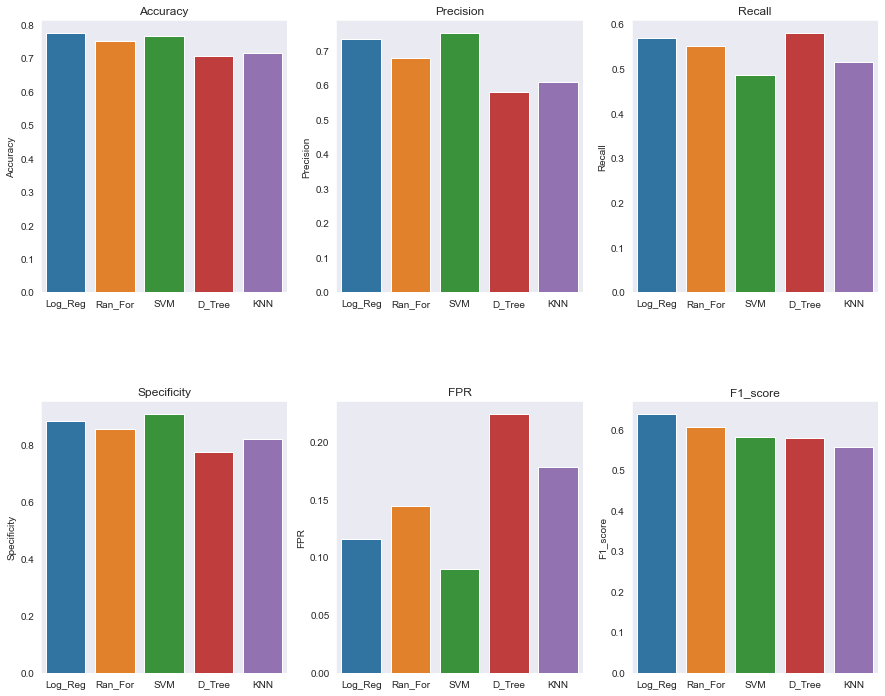

In [29]:
fig, axs = plt.subplots(2,3, figsize=(15,12))
fig.subplots_adjust(hspace=0.4)
axs=axs.ravel()
i=0
for index in k_fold_df.index:
    sns.barplot(x=k_fold_df.columns,y=k_fold_df.loc[index,:],ax=axs[i])
    axs[i].set_title(index)
    i+=1
        
fig.show()

* Accuracy of Logistic Regression, Random Forest and SVM are almost same.
* Precision of SVM and Logistic Regression is better than the other three models.
* Recall value of Decision Tree, Logistic Regression and Random Forest are better.

In [30]:
def roc_chart(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    y_pred = model.predict(x_test)
    roc_auc = roc_auc_score(y_test,y_pred)
    return roc_auc,y_pred_proba

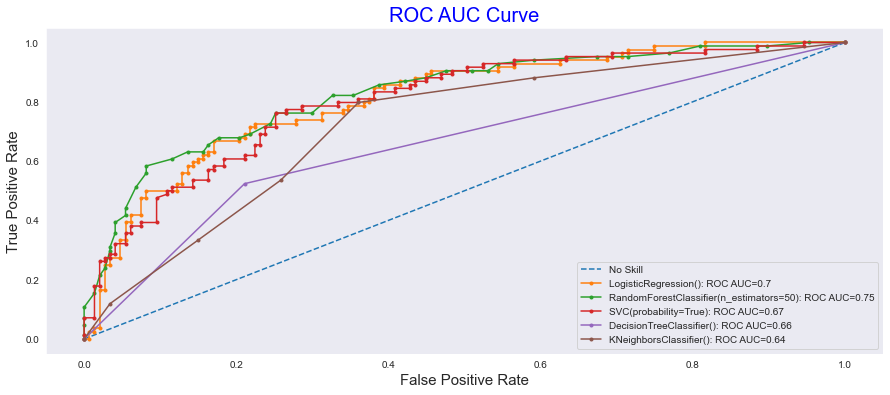

In [31]:
plt.figure(figsize=(15,6))
ns_probs = [1 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
model_list=[LogisticRegression(),RandomForestClassifier(n_estimators=50),SVC(probability=True),
 DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=12)


for col in model_list:
    r_auc,y_proba = roc_chart(col,x_train,y_train,x_test,y_test)
    lab = '{}: ROC AUC={}'.format(col,round(r_auc,2))
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab)
    
    
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.legend()
plt.title('ROC AUC Curve', fontdict={'fontsize':20,
                                    'color':'blue'})
plt.show()

* According to above ROC AUC curve it is clear that Random forest performs best.
* Whereas three models --> Logistic regression, SVM and Random Forest gives almost similar result.

### Random Forest 

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
rfc = RandomForestClassifier(random_state=100)

parms = {
        'n_estimators': [30,40,50,60],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
}

In [34]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid = parms, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 40, 50, 60]})

In [35]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 40}

In [36]:
rfc = RandomForestClassifier(n_estimators=40,max_features='log2',max_depth=5,criterion='entropy')
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [37]:
confusion_matrix(y_test,y_pred_rfc)

array([[130,  17],
       [ 39,  45]], dtype=int64)

In [38]:
rfc_acc = accuracy_score(y_test,y_pred_rfc)
rfc_acc

0.7575757575757576

### KNN (K-Nearest Neighbor)

In [39]:
n_neighbors = []
knn_acc = []
for i in range(3,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn_acc.append(knn.score(x_test,y_test))
    n_neighbors.append(i)

In [40]:
print('Best Accuracy at n_neighbors = {}'.format(n_neighbors[knn_acc.index(max(knn_acc))]))

Best Accuracy at n_neighbors = 12


In [41]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [42]:
confusion_matrix(y_test,y_pred_knn)

array([[124,  23],
       [ 43,  41]], dtype=int64)

In [43]:
knn_acc = accuracy_score(y_test,y_pred_knn)
knn_acc

0.7142857142857143